Mean Squared Error: 984930442653.1036
R-squared: 0.3522009808739426


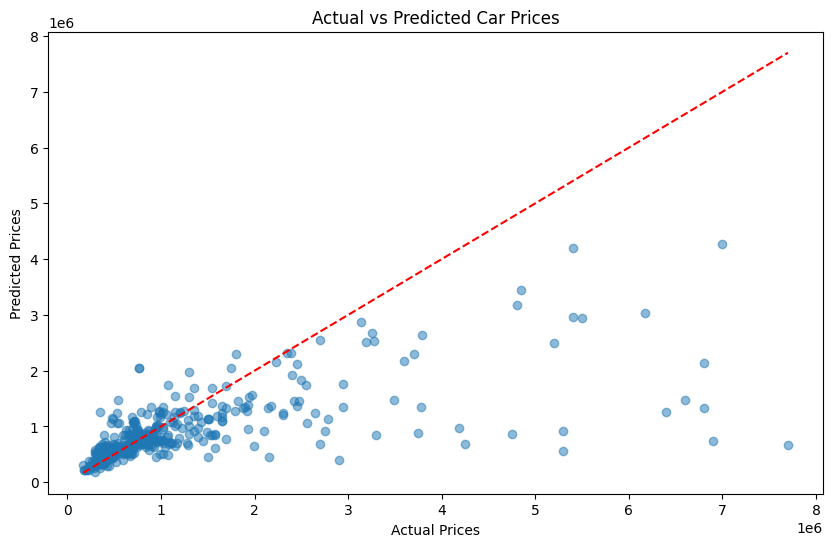

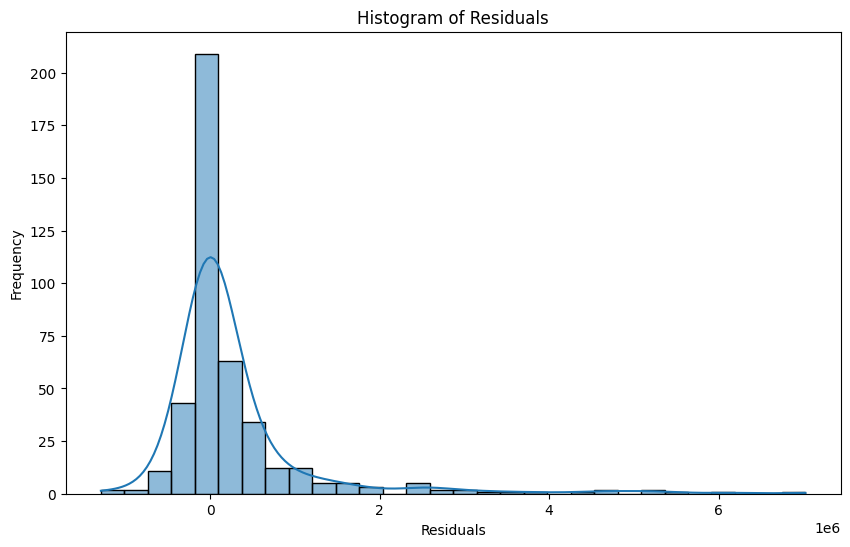

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/used_car_dataset.csv')

# Convert 'car_price_in_rupees' to numeric
def convert_price(price_str):
    price_str = price_str.replace('₹', '').replace(',', '').strip()
    if 'Crore' in price_str:
        return float(price_str.replace('Crore', '').strip()) * 10000000
    elif 'Lakh' in price_str:
        return float(price_str.replace('Lakh', '').strip()) * 100000
    elif 'Thousand' in price_str:
        return float(price_str.replace('Thousand', '').strip()) * 1000
    else:
        return float(price_str)

df['car_price_in_rupees'] = df['car_price_in_rupees'].apply(convert_price)

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target
X = df.drop('car_price_in_rupees', axis=1)
y = df['car_price_in_rupees']

# Identify numerical and categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization: Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Visualization: Histogram of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()